## AGRICULTURE
* ID - UniqueID - String
* Estimated_Insects_Count - Estimated insects count per square meter - Integer - Continuous Variable
* Crop_Type - Category of Crop(0,1) - Categorical Variable
* Soil_Type - Category of Soil(0,1) - Categorical Variable
* Pesticide_Use_Category - Type of pesticide uses(1-Never, 2-Previously Used, 3-Currently Using) - Categorical Variable
* Number_Doses_Week - Integer - Continuous Variable
* Number_Weeks_Used - Integer - Continuous Variable
* Number_Weeks_Quit - Integer - Continuous Variable
* Season - Season Category(1,2,3) - Categorical Variable
* Crop_Damage - (0-Alive, 1-Damage due to other causes, 2-Damage due to pesticides) - Categorical Variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)

In [3]:
df_train = pd.read_excel("D:/STUDIES/DATA TRAINED/DATASETS/Data-Science-ML-Capstone-Projects-master/train_agriculture.xlsx")
df_test = pd.read_excel("D:/STUDIES/DATA TRAINED/DATASETS/Data-Science-ML-Capstone-Projects-master/test_agriculture.xlsx")
df_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [7]:
df_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


* Estimated_Insects_Count varies from 150 to 4097-May Contain Outliers- considerably big difference between 3rd quartile and max
* Number_Weeks_Used varies from 0 to 66-May Contain Outliers-considerably big difference between 3rd quartile and max
* Number_Weeks_Quit	varies from 0 to 47-May Contain Outliers-considerably big difference between 3rd quartile and max
* Number_Doses_Week	varies from 0 to 95-May Contain Outliers-considerably big difference between 3rd quartile and max

In [8]:
df_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [9]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

##### Null values in 'Number_Weeks_Used'  in both train and test datasets
* We can fill the null values based on other categories

,Number_Weeks_Used
Crop_Type,
0,28.906211
1,28.838847


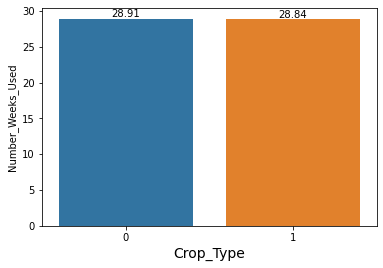

In [10]:
df_grp = df_train[['Crop_Type','Number_Weeks_Used']].groupby('Crop_Type').mean()
ax = sns.barplot(x=df_grp.index,y=df_grp['Number_Weeks_Used'])
ax.set_xlabel('Crop_Type',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
df_grp

There is no significant difference between the means when grouped by Crop_Type

,Number_Weeks_Used
Soil_Type,
0,30.069693
1,27.590081


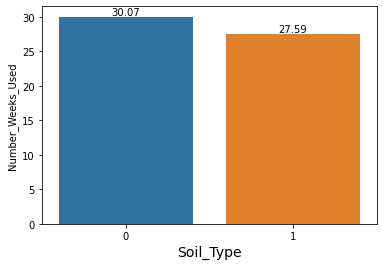

In [11]:
df_grp1 = df_train[['Soil_Type','Number_Weeks_Used']].groupby('Soil_Type').mean()
ax = sns.barplot(x=df_grp1.index,y=df_grp1['Number_Weeks_Used'])
ax.set_xlabel('Soil_Type',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
df_grp1

There is slight difference between the means when grouped by Soil_Type

,Number_Weeks_Used
Pesticide_Use_Category,
1,0.000000
2,26.395317
3,35.818631


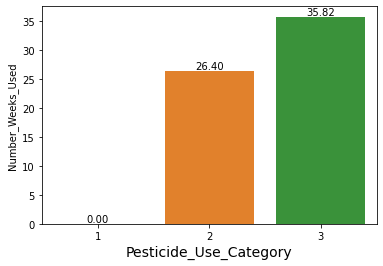

In [12]:
df_grp2 = df_train[['Pesticide_Use_Category','Number_Weeks_Used']].groupby('Pesticide_Use_Category').mean()
ax = sns.barplot(x=df_grp2.index,y=df_grp2['Number_Weeks_Used'])
ax.set_xlabel('Pesticide_Use_Category',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
df_grp2

There is significant difference between the means when grouped by Pesticide_Use_Category

,Number_Weeks_Used
Season,
1,29.050874
2,28.892344
3,28.639061


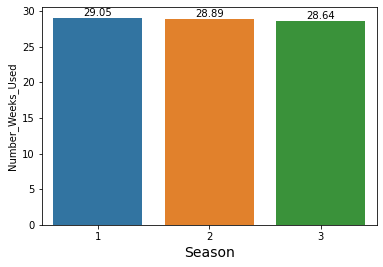

In [13]:
df_grp3 = df_train[['Season','Number_Weeks_Used']].groupby('Season').mean()
ax = sns.barplot(x=df_grp3.index,y=df_grp3['Number_Weeks_Used'])
ax.set_xlabel('Season',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
df_grp3

There is no significant difference between the means when grouped by Season

Number_Weeks_Used
Crop_Type Soil_Type                   
0         0                  30.940832
          1                  27.045779
1         0                  27.986003
          1                  30.704082

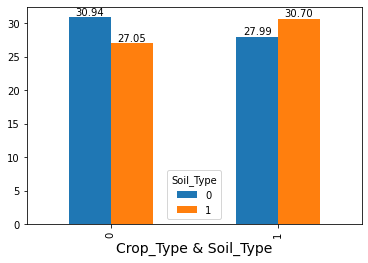

In [14]:
df_grp4 = df_train[['Crop_Type', 'Soil_Type','Number_Weeks_Used']].groupby(['Crop_Type', 'Soil_Type']).mean()
data = df_grp4.Number_Weeks_Used
ax = data.unstack().plot(kind='bar')
plt.xlabel('Crop_Type & Soil_Type',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
df_grp4

There is only slight difference between the means when grouped by (Crop_Type & Soil_Type)

Number_Weeks_Used
Crop_Type Soil_Type Pesticide_Use_Category                   
0         0         1                                0.000000
                    2                               28.680233
                    3                               40.172308
          1         1                                0.000000
                    2                               24.853891
                    3                               37.427653
1         0         1                                0.000000
                    2                               24.467456
                    3                               33.304795
          1         1                                0.000000
                    3                               31.673684

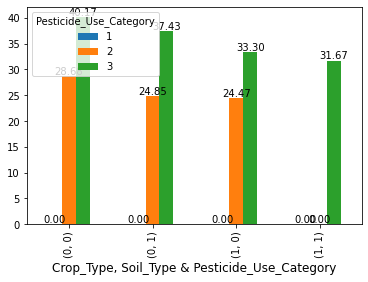

In [15]:
df_grp5 = df_train[['Crop_Type', 'Soil_Type','Pesticide_Use_Category','Number_Weeks_Used']].groupby(['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category']).mean()
data = df_grp5.Number_Weeks_Used
ax = data.unstack().plot(kind='bar')
plt.xlabel('Crop_Type, Soil_Type & Pesticide_Use_Category',fontsize=12)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
df_grp5


* There is significant difference between the means when grouped by (Crop_Type, Soil_Type & Pesticide_Use_Category)
* Therefore we can fill the null values according to the above category

In [16]:
df_train["Number_Weeks_Used"] = df_train.groupby(['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category'])["Number_Weeks_Used"].transform(lambda x: x.fillna(int(x.mean())) )
df_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [17]:
df_test["Number_Weeks_Used"] = df_test.groupby(['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category'])["Number_Weeks_Used"].transform(lambda x: x.fillna(int(x.mean())) )
df_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [18]:
df_train["Number_Weeks_Used"] = df_train["Number_Weeks_Used"].astype('int64')
df_test["Number_Weeks_Used"] = df_test["Number_Weeks_Used"].astype('int64')
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0,0,1,0
1,F00000003,209,1,0,1,0,0,0,2,1
2,F00000004,257,1,0,1,0,0,0,2,1
3,F00000005,257,1,1,1,0,0,0,2,1
4,F00000006,342,1,0,1,0,0,0,2,1


### EDA

##### Checking the number of distinct values and their counts in columns

In [19]:
df_train['Crop_Type'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

In [20]:
df_train['Soil_Type'].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [21]:
df_train['Pesticide_Use_Category'].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

In [22]:
df_train['Number_Doses_Week'].value_counts()

20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64

In [23]:
df_train['Number_Weeks_Used'].value_counts()

24    299
28    221
20    209
30    194
40    171
     ... 
59      5
62      5
66      3
65      3
64      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

In [24]:
df_train['Number_Weeks_Quit'].value_counts()

0     1496
14     146
2      145
6      140
12     137
      ... 
42       3
44       2
43       2
47       2
46       1
Name: Number_Weeks_Quit, Length: 47, dtype: int64

In [25]:
df_train['Season'].value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [26]:
df_train['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

* Number_Doses_Week column has values in multiples of 5

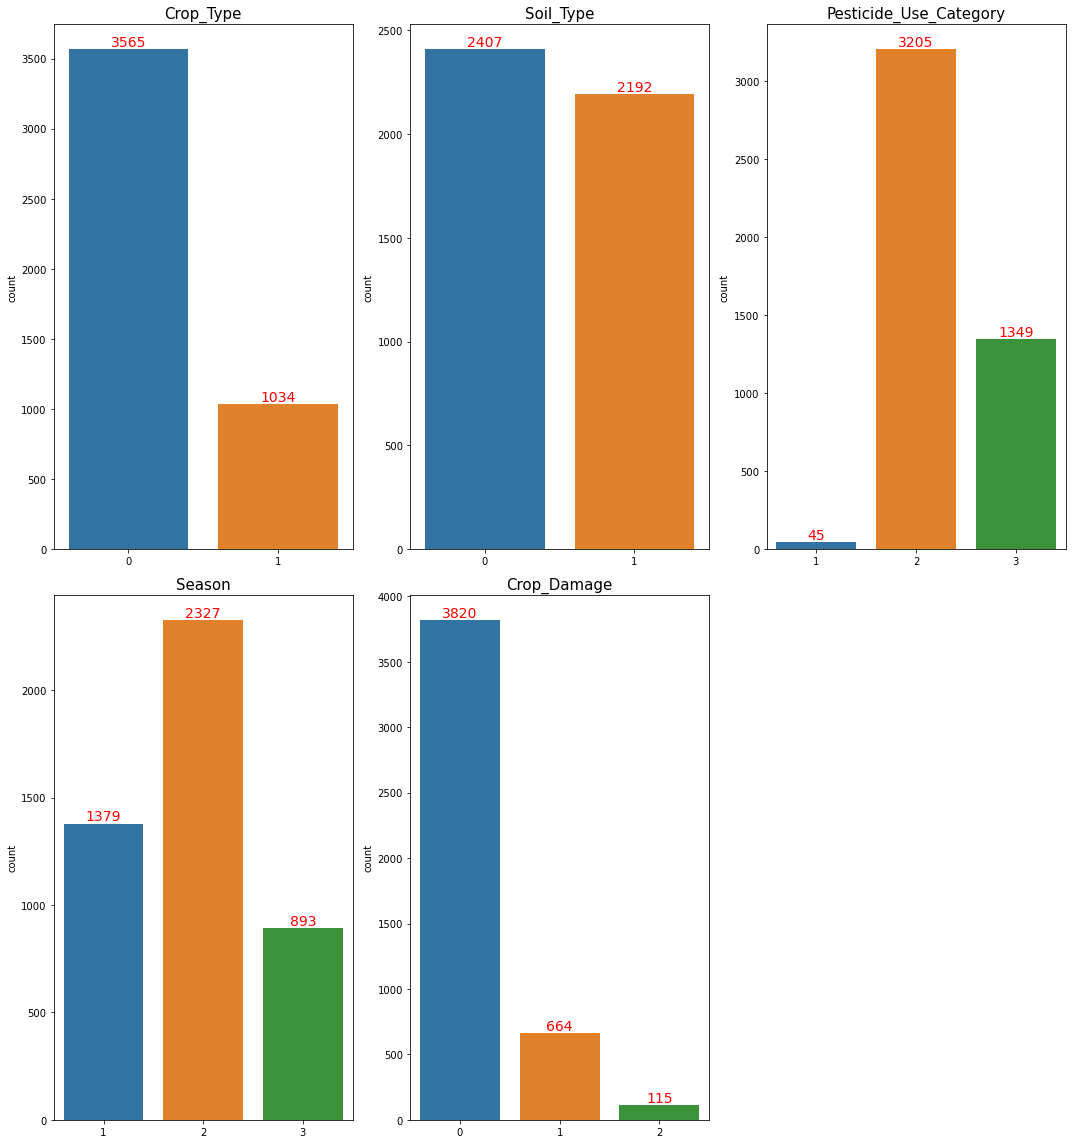

In [27]:
plt.figure(figsize=(15,16))
cat = ['Crop_Type', 'Soil_Type','Pesticide_Use_Category', 'Season', 'Crop_Damage']
for i in range(len(cat)):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(df_train[cat[i]])
    ax.set_title(cat[i],fontsize=15)
    ax.set_xlabel("")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
    plt.tight_layout()

* Only few crops have been damaged by pesticides
* Only very few pesticides have never been used
* Crop_Type 0 is preferred more than 1

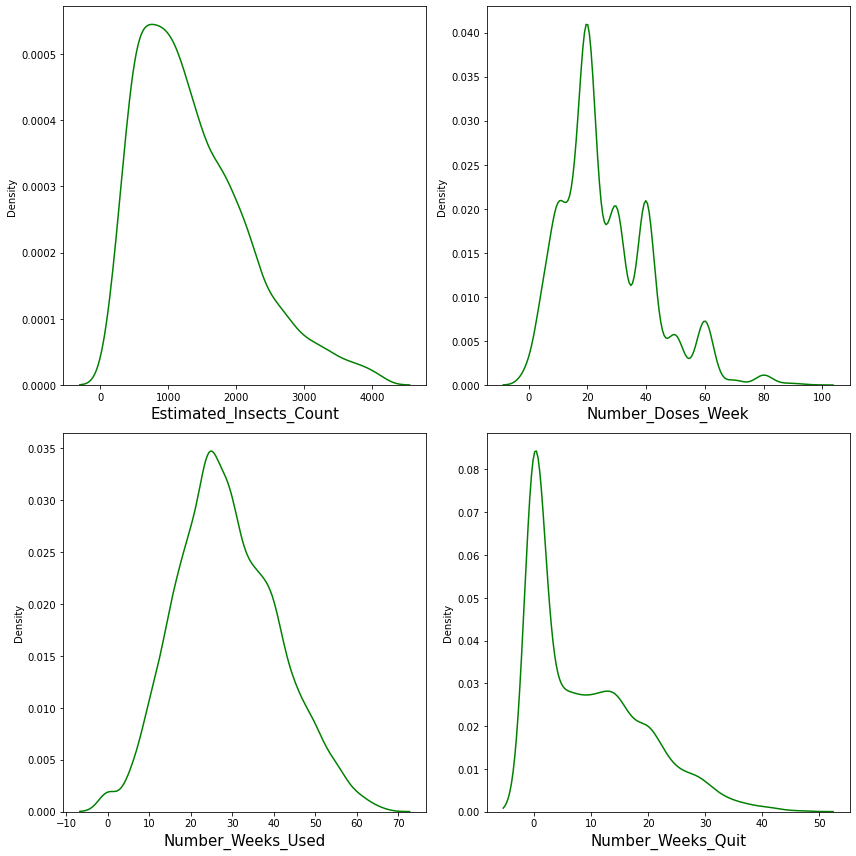

In [28]:
plt.figure(figsize=(12,12))
cont = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used','Number_Weeks_Quit']
for i in range(len(cont)):
    plt.subplot(2,2,i+1)
    ax = sns.distplot(df_train[cont[i]], hist = False, color = "green")
    ax.set_xlabel(cont[i],fontsize=15)
    plt.tight_layout()

* 'Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Quit' columns are right skewed
* 'Number_Weeks_Used'column is normally distributed

### OUTLIER REMOVAL

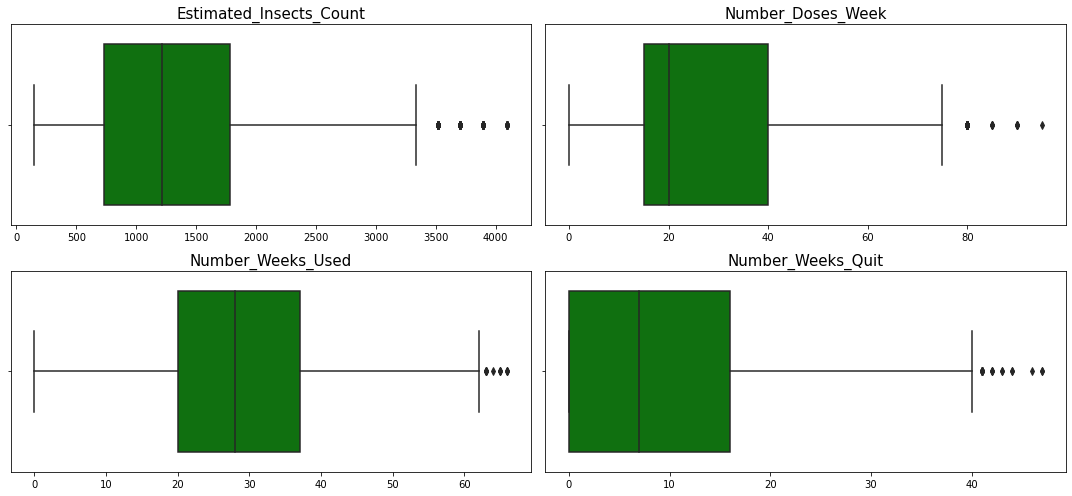

In [29]:
plt.figure(figsize=(15,7))
cont = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used','Number_Weeks_Quit']
for i in range(len(cont)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(df_train[cont[i]], orient='h', color = "green")
    ax.set_title(cont[i],fontsize=15)
    ax.set_xlabel("")
    plt.tight_layout()

* All 4 columns have higher outliers

In [30]:
temp_df = df_train[cont]
threshold = 3
temp_df

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,188,0,0,0
1,209,0,0,0
2,257,0,0,0
3,257,0,0,0
4,342,0,0,0
...,...,...,...,...
4594,2138,20,24,1
4595,2139,30,47,2
4596,2267,10,7,27
4597,2267,10,20,24


In [31]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([  22,   23,  100,  185,  252,  325,  346,  375,  384,  702,  703,
         704,  705,  706,  807,  855,  856,  911,  978,  998, 1017, 1019,
        1097, 1212, 1291, 1307, 1324, 1326, 1329, 1337, 1341, 1342, 1343,
        1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406, 1443, 1457, 1489,
        1523, 1589, 1652, 1654, 1868, 2019, 2090, 2136, 2140, 2165, 2174,
        2183, 2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2392, 2553,
        2565, 2589, 2590, 2591, 2615, 2702, 2714, 2779, 2942, 2944, 2945,
        3048, 3241, 3252, 3253, 3254, 3255, 3256, 3257, 3336, 3388, 3526,
        3682, 3718, 3766, 3830, 3840, 3841, 3856, 3894, 3902, 3915, 3919,
        3932, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3940,
        4024, 4186, 4213, 4274, 4375, 4376, 4436, 4516], dtype=int64),
 array([0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 

In [32]:
df_new = df_train[(z<threshold).all(axis=1)]
df_new

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0,0,1,0
1,F00000003,209,1,0,1,0,0,0,2,1
2,F00000004,257,1,0,1,0,0,0,2,1
3,F00000005,257,1,1,1,0,0,0,2,1
4,F00000006,342,1,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,24,1,1,1
4595,F00008079,2139,0,1,2,30,47,2,1,1
4596,F00008080,2267,0,1,2,10,7,27,2,0
4597,F00008082,2267,0,1,2,10,20,24,2,0


In [33]:
#Percentage of data lost
((len(df_train)-len(df_new))/len(df_train))*100

2.4787997390737115

Percentage of data lost is well less than 5%, therefore we will proceed with this method

### BIVARIATE ANALYSIS

In [34]:
df_new.reset_index(inplace = True,drop=True)
df_new

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0,0,1,0
1,F00000003,209,1,0,1,0,0,0,2,1
2,F00000004,257,1,0,1,0,0,0,2,1
3,F00000005,257,1,1,1,0,0,0,2,1
4,F00000006,342,1,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4480,F00008078,2138,0,1,2,20,24,1,1,1
4481,F00008079,2139,0,1,2,30,47,2,1,1
4482,F00008080,2267,0,1,2,10,7,27,2,0
4483,F00008082,2267,0,1,2,10,20,24,2,0


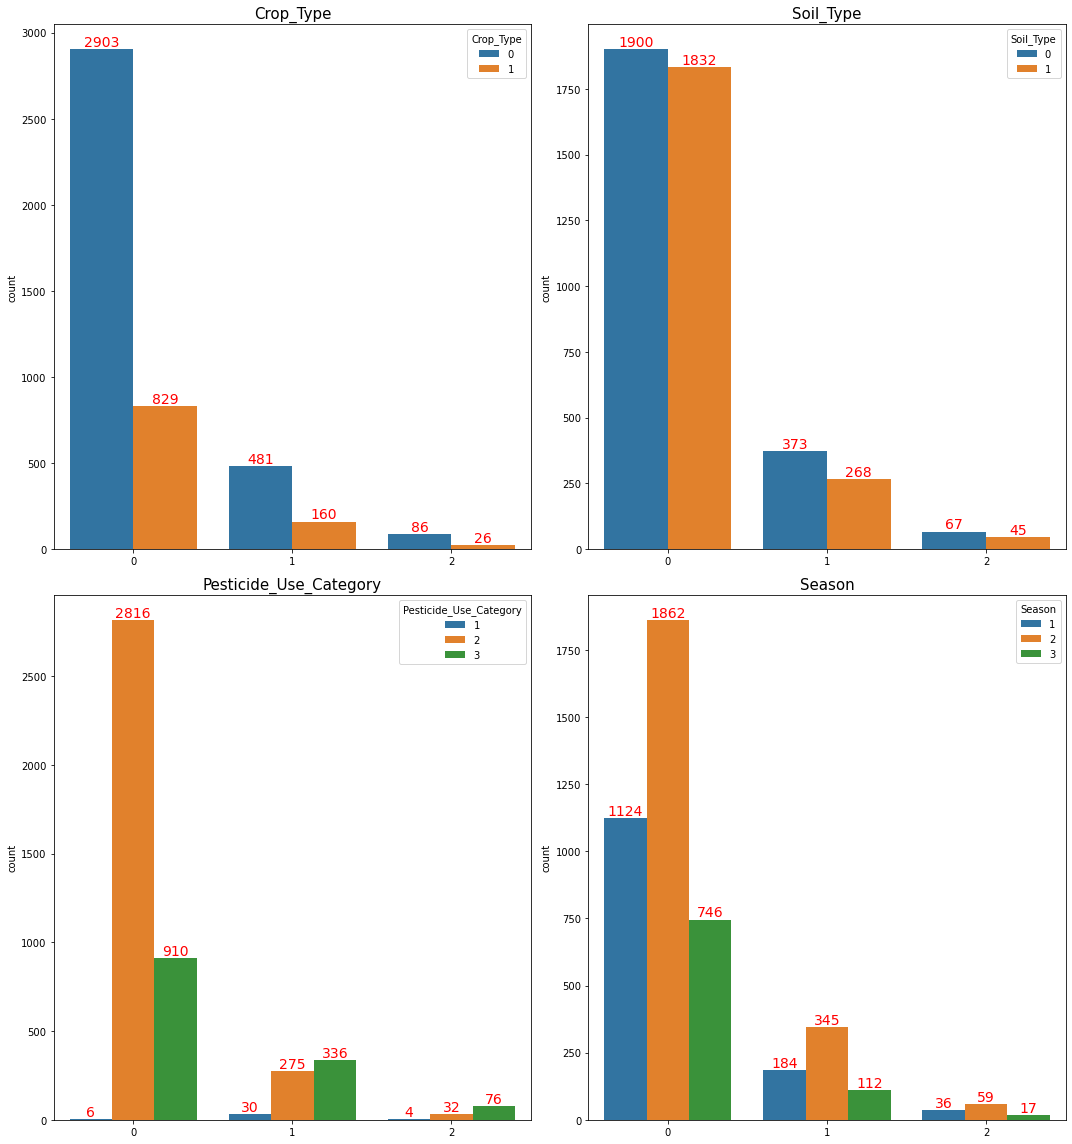

In [35]:
plt.figure(figsize=(15,16))
cat = ['Crop_Type', 'Soil_Type','Pesticide_Use_Category', 'Season']
for i in range(len(cat)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=df_new['Crop_Damage'], hue=df_new[cat[i]])
    ax.set_title(cat[i],fontsize=15)
    ax.set_xlabel("")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
    plt.tight_layout()

* Of the crops damaged by pesticides - pesticide 3 was most used among those
* Other variables are similary distributed for all cases of crop damage

In [36]:
df_new_nev = df_new[df_new['Crop_Damage']==0]
df_new_oth = df_new[df_new['Crop_Damage']==1]
df_new_pes = df_new[df_new['Crop_Damage']==2]

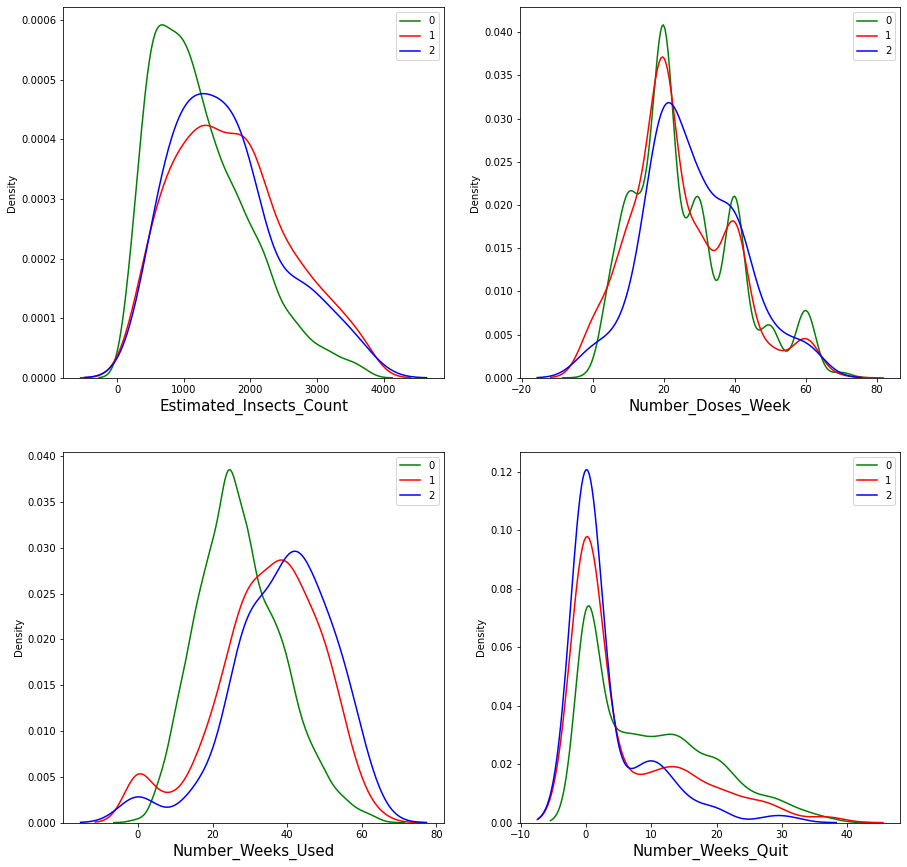

In [37]:
plt.figure(figsize=(15,15))
cont = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used','Number_Weeks_Quit']
for i in range(len(cont)):
    plt.subplot(2,2,i+1)
    ax = sns.distplot(df_new_nev[cont[i]], hist = False, color = "green",label='0')
    ax = sns.distplot(df_new_oth[cont[i]], hist = False, color = "red",label='1')
    ax = sns.distplot(df_new_pes[cont[i]], hist = False, color = "blue",label='2')
    ax.set_xlabel(cont[i],fontsize=15)
    plt.legend()

* 'Estimated_Insects_Count', 'Number_Weeks_Used' columns have lower values when crop is alive

##### We can drop the ID column

In [38]:
df_new.drop('ID',axis=1,inplace=True)
df_test.drop('ID',axis=1,inplace=True)

### CORRELATION

<AxesSubplot:>

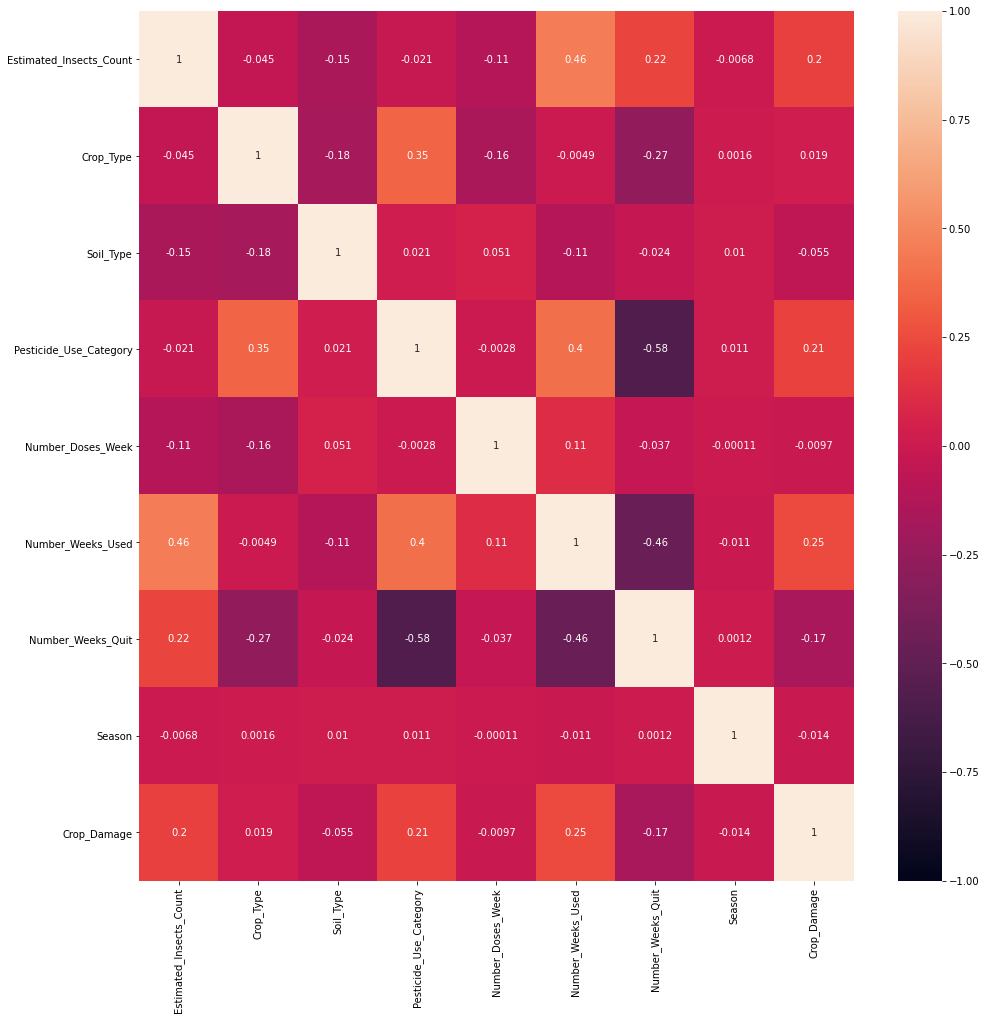

In [39]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True,vmin = -1, vmax = 1)

* 'Estimated_Insects_Count', 'Pesticide_Use_Category' and 'Number_Weeks_Used' have a positive correlation with Crop_Damage variable 

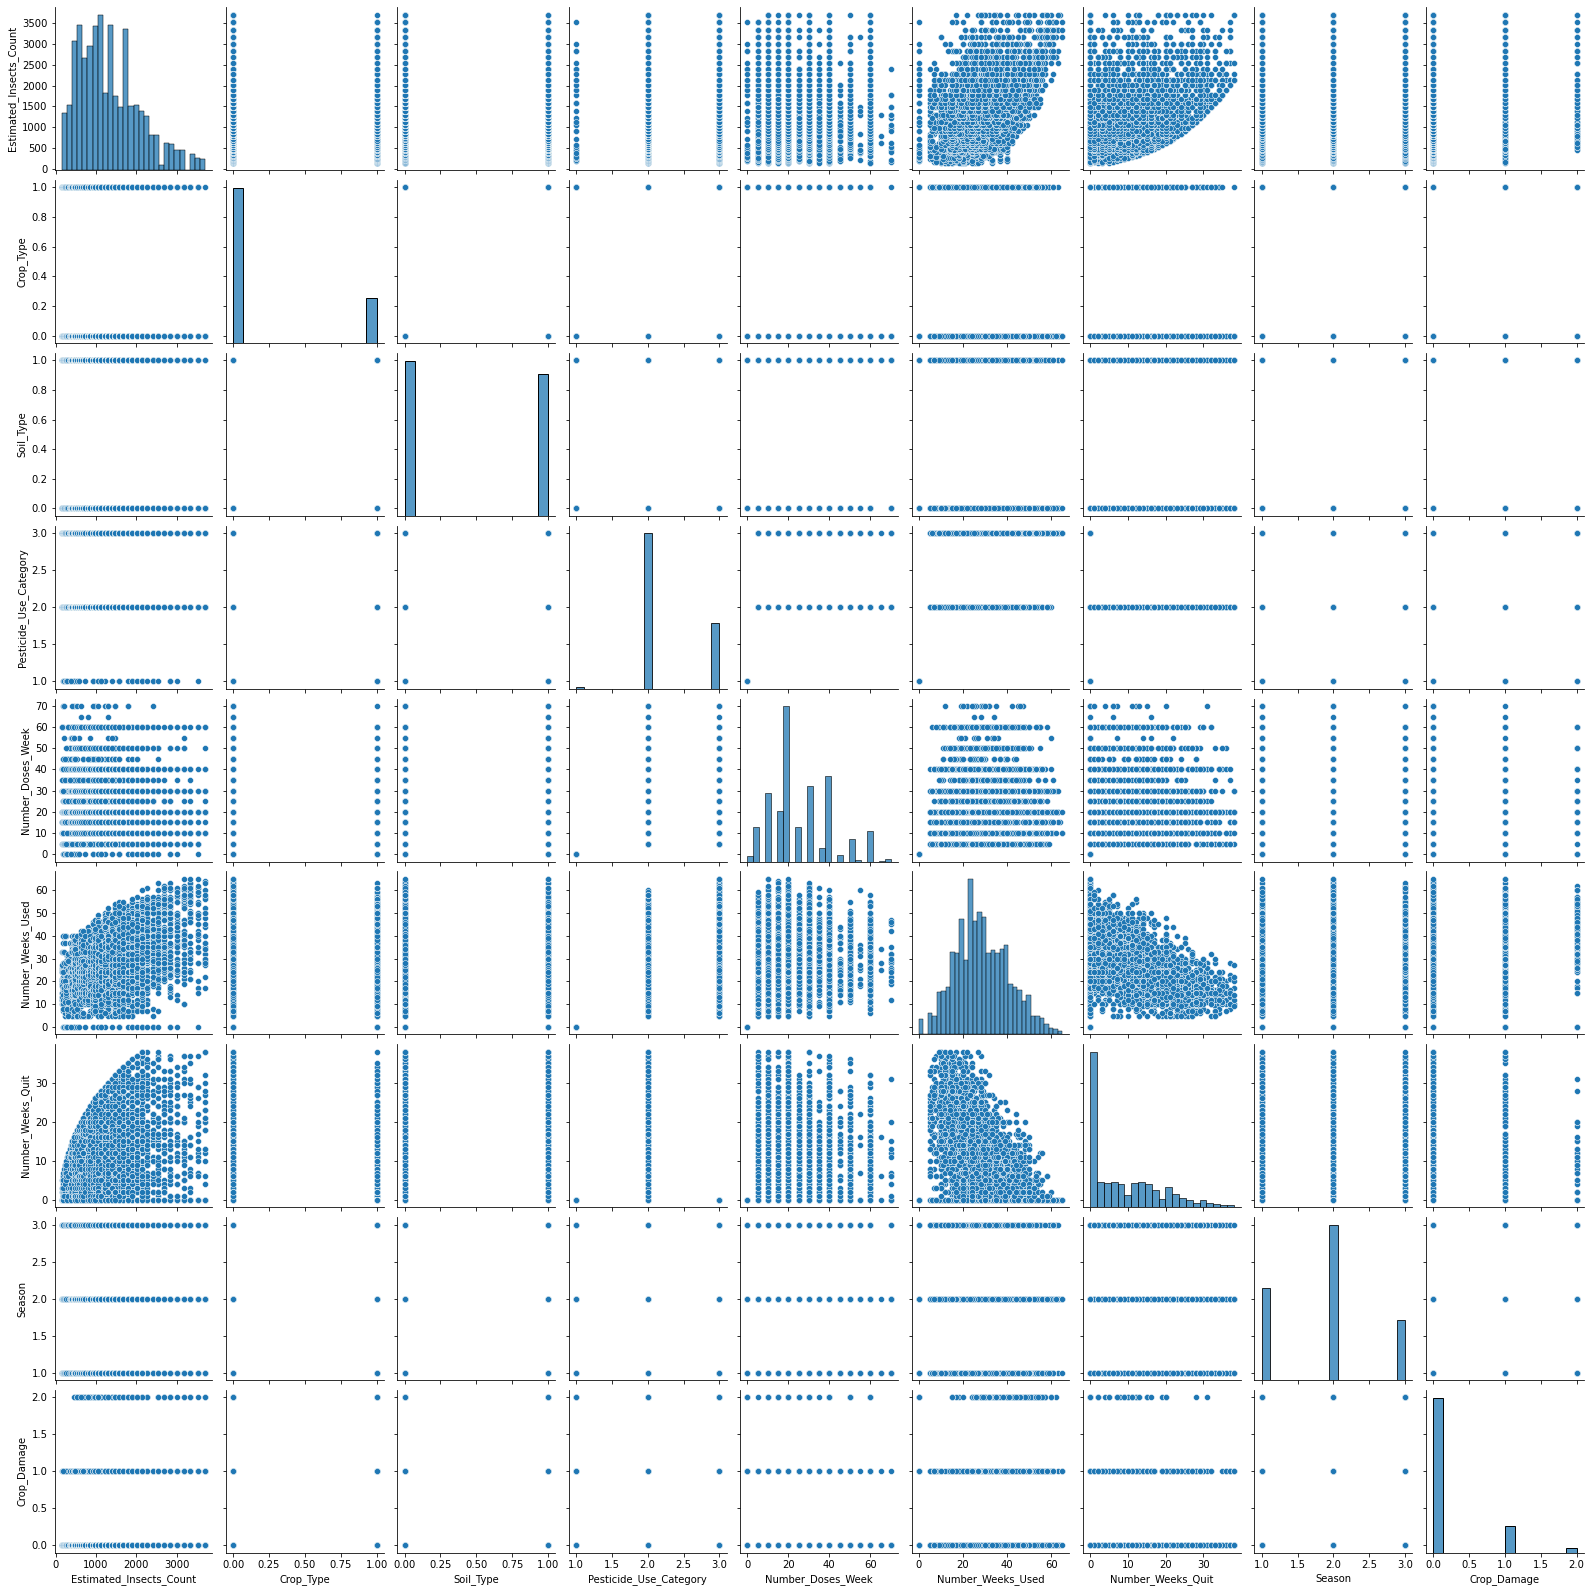

In [40]:
sns.pairplot(df_new)

In [41]:
x = df_new.drop('Crop_Damage',axis=1)
y = df_new.loc[:,'Crop_Damage']
test_x = df_test.copy()

### SKEWNESS REMOVAL

In [42]:
df_new[cont].skew()

Estimated_Insects_Count    0.788269
Number_Doses_Week          0.702556
Number_Weeks_Used          0.267400
Number_Weeks_Quit          0.835284
dtype: float64

In [43]:
from sklearn.preprocessing import power_transform
transf = pd.DataFrame(power_transform(x[cont],method='yeo-johnson'))
transf1 = pd.DataFrame(power_transform(test_x[cont],method='yeo-johnson'))
transf.rename({0: 'Estimated_Insects_Count', 1: 'Number_Doses_Week', 2: 'Number_Weeks_Used', 3: 'Number_Weeks_Quit'}, axis=1, inplace = True)
transf1.rename({0: 'Estimated_Insects_Count', 1: 'Number_Doses_Week', 2: 'Number_Weeks_Used', 3: 'Number_Weeks_Quit'}, axis=1, inplace = True)
x.drop(cont, axis=1 ,inplace=True)
test_x.drop(cont, axis=1 ,inplace=True)
x = pd.concat((x, transf), axis=1)
test_x = pd.concat((test_x, transf1), axis=1)

### MODEL BUILDING

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_c = sc.fit_transform(x)
x_c = pd.DataFrame(x_c)
x_c_test = sc.fit_transform(test_x)
x_c_test = pd.DataFrame(x_c_test)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "SVC" : {'model':SVC(),
             'params':{'kernel' :['poly', 'rbf', 'sigmoid'],
                       'gamma':['scale', 'auto']
                      },
            },
    "Decision Tree" : {'model':DecisionTreeClassifier(),
                       'params':{'criterion' :['gini','entropy'],
                                 'max_depth' : [5,8,50,100,150],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestClassifier(),
                       'params':{'n_estimators':[50,100],
                                 'max_depth':[5,8,50], 
                                 'min_samples_leaf':[2,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsClassifier(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan','minkowski']
                                      }
                            }
}

In [45]:
max_scr = 0

for r_s in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        acc = accuracy_score(y_test,pred_test)
        if acc > max_scr:
            max_scr = acc
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)

Model :  SVC()
Score :  0.8729096989966555
Random State :  999


#### SVC MODEL HAS AN ACCURACY OF 0.87 AND PERFORMS BEST AT RANDOM STATE 999

In [55]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=999,test_size=0.20)
grid = GridSearchCV(models['SVC']['model'], models['SVC']['params'], cv=4, scoring = 'accuracy')
grid.fit(x_train,y_train)
print({
    'model': 'SVC',
    'best_score' : grid.best_score_,
    'best_params' : grid.best_params_
})

{'model': 'SVC', 'best_score': 0.8375139353400223, 'best_params': {'gamma': 'auto', 'kernel': 'rbf'}}


In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
svc = SVC(gamma='auto', kernel='rbf')
clf = svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Classification Report : ")
print(classification_report(y_test,y_pred))

Accuracy Score :  0.8361204013377926
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       746
           1       0.83      0.04      0.07       128
           2       0.00      0.00      0.00        23

    accuracy                           0.84       897
   macro avg       0.56      0.35      0.33       897
weighted avg       0.81      0.84      0.77       897



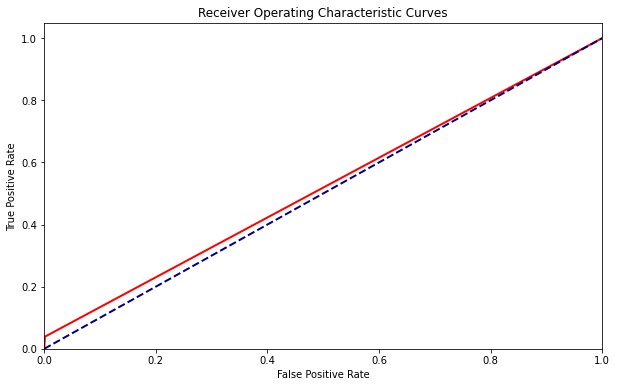

In [57]:
# predictions = clf.predict_pro(x_test)
plt.figure(figsize=(10,6))
x = roc_curve(y_test, y_pred,pos_label = True)
plt.plot(x[0], x[1], color='red', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

In [58]:
y_pred = svc.predict(x_c_test)

df_test['Predicted'] = y_pred
df_test
# y_pred

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Predicted
0,188,1,1,1,0,0,0,2,1
1,410,1,1,1,0,0,0,2,1
2,626,1,0,1,0,0,0,2,1
3,731,1,0,1,0,0,0,2,1
4,789,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34,7,3,0
1195,1132,0,1,2,40,25,3,1,0
1196,1132,0,1,2,20,13,23,1,0
1197,1212,0,1,2,10,35,5,1,0


In [59]:
df_test['Predicted'].value_counts()

0    1177
1      22
Name: Predicted, dtype: int64

##### 22 crops are predicted to be damaged by other causes and 1177 crops are predicted to be alive

In [60]:
df_test.to_csv("Agriculture_predicted.csv", index=False)

In [61]:
import joblib
joblib.dump(svc,"Agriculture_svc.pkl")

['Agriculture_svc.pkl']